# Coding Exercises (Part 11)

Now, you will have the opportunity to analyze your own dataset. <br>
__Follow the instructions__ and insert your code! You are either requested to 
- Complete the Code and __Fill in the gaps__. Gaps are marked with "__---__" and are __placeholders__ for your code fragment
- Write Code completely __on your own__ 

In some exercises, you will find questions that can only be answered, if your code is correct and returns the right output! The correct answer is provided below your coding cell. There you can check whether your code is correct.

If you need a hint, check the __Hints Section__ at the end of this Notebook. Exercises and Hints are numerated accordingly.

If you need some further help or if you want to check your code, you can also watch the __solutions videos__ or check the __solutions notebook__.

### Have Fun!

--------------------------------------------------------------------------------------------------------------

## Time Series Data in Pandas: Introduction


### Exercise 11: Downsampling and reindexing Time Series

In [10]:
#run the cell!
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

C:\Users\ahmad\AppData\Local\Temp\ipykernel_28576\3482661469.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [12]:
pd.options.display.float_format = "{:.4f}".format

In [733]:
# run the cell!
stocks = pd.read_csv("aapl_fb.csv", 
                     parse_dates = ["Date"], 
                     index_col = "Date")

In [735]:
# run the cell!
stocks.head(30)

,AAPL,FB
Date,,
2015-01-02,109.3300,78.4500
2015-01-05,106.2500,77.1900
2015-01-06,106.2600,76.1500
2015-01-07,107.7500,76.1500
2015-01-08,111.8900,78.1800
2015-01-09,112.0100,77.7400
2015-01-12,109.2500,76.7200
2015-01-13,110.2200,76.4500
2015-01-14,109.8000,76.2800


In [20]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1005 entries, 2015-01-02 to 2018-12-28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1005 non-null   float64
 1   FB      1005 non-null   float64
dtypes: float64(2)
memory usage: 23.6 KB


In [72]:
stocks.head(5)

,AAPL,FB
Date,,
2015-01-02,109.3300,78.4500
2015-01-05,106.2500,77.1900
2015-01-06,106.2600,76.1500
2015-01-07,107.7500,76.1500
2015-01-08,111.8900,78.1800


In [731]:
# stocks.iloc[[2,4,6],:] = None
# stocks.head(10)

In [142]:
stocks.bfill().head(8)

,AAPL,FB
Date,,
2015-01-02,109.3300,78.4500
2015-01-05,106.2500,77.1900
2015-01-06,107.7500,76.1500
2015-01-07,107.7500,76.1500
2015-01-08,112.0100,77.7400
2015-01-09,112.0100,77.7400
2015-01-12,110.2200,76.4500
2015-01-13,110.2200,76.4500


In [52]:
stocks.loc["2015-01-01":"2015-12-31"].mean()

AAPL   120.0400
FB      88.7729
dtype: float64

In [154]:
stocks.resample(rule = "M", 
                #offset = 2 
               ).mean().head(5)

,AAPL,FB
Date,,
2015-01-31,110.9076,76.6694
2015-02-28,125.4321,76.9511
2015-03-31,125.9709,81.0132
2015-04-30,127.2914,82.0914
2015-05-31,128.7615,79.4200


In [164]:
stocks.reset_index().groupby("Date").agg("sum")

,AAPL,FB
Date,,
2015-01-02,109.3300,78.4500
2015-01-05,106.2500,77.1900
2015-01-06,0.0000,0.0000
2015-01-07,107.7500,76.1500
2015-01-08,0.0000,0.0000
...,...,...
2018-12-21,150.7300,124.9500
2018-12-24,146.8300,124.0600
2018-12-26,157.1700,134.1800


In [168]:
import datetime as dt

In [174]:
stocks.reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1005 non-null   datetime64[ns]
 1   AAPL    1002 non-null   float64       
 2   FB      1002 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 23.7 KB


In [208]:
stocks.reset_index().Date.dt.weekday

0       4
1       0
2       1
3       2
4       3
       ..
1000    4
1001    0
1002    2
1003    3
1004    4
Name: Date, Length: 1005, dtype: int32

In [336]:
stocks.loc["2015-01-05":"2015-01-11"].sum() , stocks.loc["2015-01-11":"2015-01-18"].sum()

(AAPL   326.0100
 FB     231.0800
 dtype: float64,
 AAPL   432.8300
 FB     301.9600
 dtype: float64)

In [450]:
stocks.resample("W",offset = 1).sum().head()

,AAPL,FB
Date,,
2015-01-04,109.3300,78.4500
2015-01-11,326.0100,231.0800
2015-01-18,432.8300,301.9600
2015-01-25,443.6500,308.4600
2015-02-01,573.6100,383.4300


In [560]:
stocks.resample(
    "15H",
    label = "left",
    #offset = "5H"
).mean().head(10)

,AAPL,FB
Date,,
2015-01-02 00:00:00,109.3300,78.4500
2015-01-02 15:00:00,NaN,NaN
2015-01-03 06:00:00,NaN,NaN
2015-01-03 21:00:00,NaN,NaN
2015-01-04 12:00:00,106.2500,77.1900
2015-01-05 03:00:00,NaN,NaN
2015-01-05 18:00:00,NaN,NaN
2015-01-06 09:00:00,NaN,NaN
2015-01-07 00:00:00,107.7500,76.1500


In [562]:
stocks.resample(
    "15H",
    label = "left",
    offset = "5H"
).mean().head(10)

,AAPL,FB
Date,,
2015-01-01 14:00:00,109.3300,78.4500
2015-01-02 05:00:00,NaN,NaN
2015-01-02 20:00:00,NaN,NaN
2015-01-03 11:00:00,NaN,NaN
2015-01-04 02:00:00,NaN,NaN
2015-01-04 17:00:00,106.2500,77.1900
2015-01-05 08:00:00,NaN,NaN
2015-01-05 23:00:00,NaN,NaN
2015-01-06 14:00:00,107.7500,76.1500


In [574]:
stocks.resample(
    "23H",
    label = "left",
    offset = "5H"
).mean().head(10)

,AAPL,FB
Date,,
2015-01-01 06:00:00,109.3300,78.4500
2015-01-02 05:00:00,NaN,NaN
2015-01-03 04:00:00,NaN,NaN
2015-01-04 03:00:00,106.2500,77.1900
2015-01-05 02:00:00,NaN,NaN
2015-01-06 01:00:00,NaN,NaN
2015-01-07 00:00:00,107.7500,76.1500
2015-01-07 23:00:00,NaN,NaN
2015-01-08 22:00:00,112.0100,77.7400


In [580]:
stocks.resample(
    "24H",
    label = "left",
    #offset = "5H"
).mean().head(10)


,AAPL,FB
Date,,
2015-01-02,109.3300,78.4500
2015-01-03,NaN,NaN
2015-01-04,NaN,NaN
2015-01-05,106.2500,77.1900
2015-01-06,NaN,NaN
2015-01-07,107.7500,76.1500
2015-01-08,NaN,NaN
2015-01-09,112.0100,77.7400
2015-01-10,NaN,NaN


In [584]:
stocks.resample(
    "24H",
    label = "left",
    offset = "5H"
).mean().head(10)


,AAPL,FB
Date,,
2015-01-01 05:00:00,109.3300,78.4500
2015-01-02 05:00:00,NaN,NaN
2015-01-03 05:00:00,NaN,NaN
2015-01-04 05:00:00,106.2500,77.1900
2015-01-05 05:00:00,NaN,NaN
2015-01-06 05:00:00,107.7500,76.1500
2015-01-07 05:00:00,NaN,NaN
2015-01-08 05:00:00,112.0100,77.7400
2015-01-09 05:00:00,NaN,NaN


In [594]:
stocks.resample(
    "W-Mon",
    label = "left",
    #offset = "8D"
).mean().head(10)

,AAPL,FB
Date,,
2014-12-29,107.7900,77.8200
2015-01-05,109.8800,76.9450
2015-01-12,108.2075,75.4900
2015-01-19,111.3500,77.1920
2015-01-26,115.8280,76.1840
2015-02-02,119.3600,75.1100
2015-02-09,125.1100,75.9175
2015-02-16,129.5000,78.0940
2015-02-23,129.7860,79.4280


In [602]:
stocks.resample(
    "W-Mon",
    label = "left",
    offset = "5D"
).mean().head(10)

,AAPL,FB
Date,,
2014-12-29,107.7900,77.8200
2015-01-05,109.8800,76.9450
2015-01-12,108.2075,75.4900
2015-01-19,111.3500,77.1920
2015-01-26,115.8280,76.1840
2015-02-02,119.3600,75.1100
2015-02-09,125.1100,75.9175
2015-02-16,129.5000,78.0940
2015-02-23,129.7860,79.4280


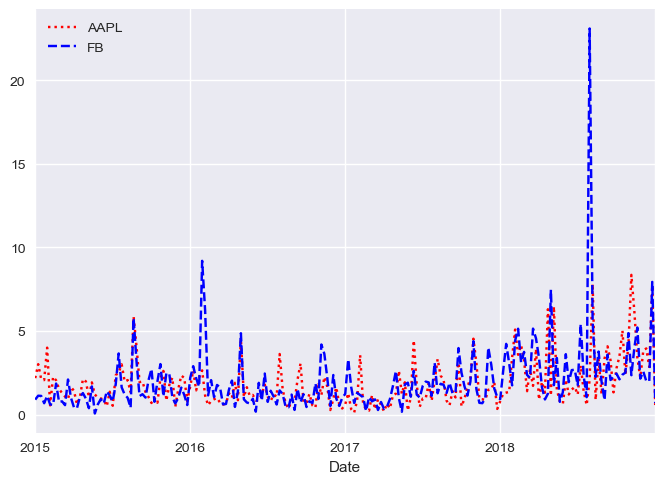

In [548]:
stocks.resample("W-MON").std().plot(style = [":" , "--"], 
                                           color = ["r", "b"]
                                          );

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


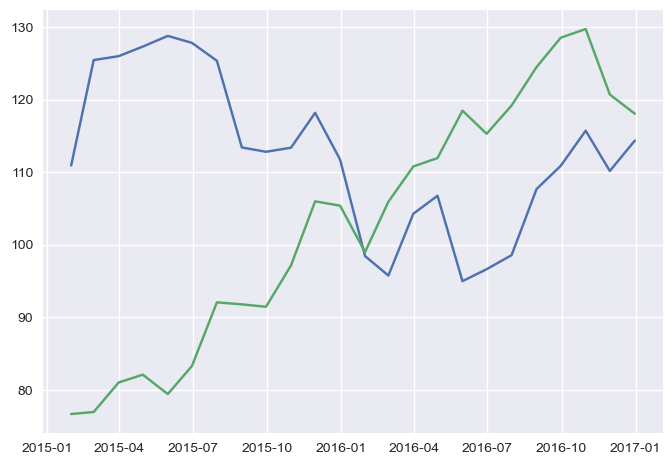

In [640]:
plt.plot(stocks.loc["2015":"2016"].resample("M").mean())
#plt.plot(stocks.loc["2015":"2016"].resample("M").mean())
plt.legend(bbox_to_anchor = (1,1))
plt.show()

98. __Change Frequency__ of stocks to __monthly__ ("Downsampling") and display the __last__ traded stock price per month! (Hint: The Index should show the last calender day of each month) <br>
What is the __last__ traded price for __Facebook__ in __March 2015__?

In [666]:
stocks.resample(rule = "M", kind = 'timestamp').last().head()

,AAPL,FB
Date,,
2015-01-31,117.1600,75.9100
2015-02-28,128.4600,78.9700
2015-03-31,124.4300,82.2200
2015-04-30,125.1500,78.7700
2015-05-31,130.2800,79.1900


In [664]:
stocks.resample(rule = "M", kind = 'timestamp').last().iloc[2,1].round(2)

82.22

The last traded price is ... 82.22!

99. Perform the __same__ operation as in __exercise 98__. Instead of displaying the __last day__ of the respective period (e.g. 2015-01-31), display the __period__ (e.g. 2015-01) in the __Index__!

In [672]:
stocks.resample(rule = "M", kind = "period").last().head()

,AAPL,FB
Date,,
2015-01,117.1600,75.9100
2015-02,128.4600,78.9700
2015-03,124.4300,82.2200
2015-04,125.1500,78.7700
2015-05,130.2800,79.1900


100. Calculate __monthly average/mean stock prices__ and save the new DataFrame in the variable __stocks_m__!

In [674]:
stocks_m = stocks.resample(rule = "M", kind = "period").mean()

What was the average stock price for __Apple__ in __April 2015__?

In [677]:
# run the cell!
stocks_m.head()

,AAPL,FB
Date,,
2015-01,110.9076,76.6694
2015-02,125.4321,76.9511
2015-03,125.9709,81.0132
2015-04,127.2914,82.0914
2015-05,128.7615,79.4200


In [683]:
stocks_m.iloc[3,0].round(2)

127.29

The average stock price was ... 127.29

101. __Plot__ __stocks__ and __stocks_m__ (figsize = (12 , 8) and compare!

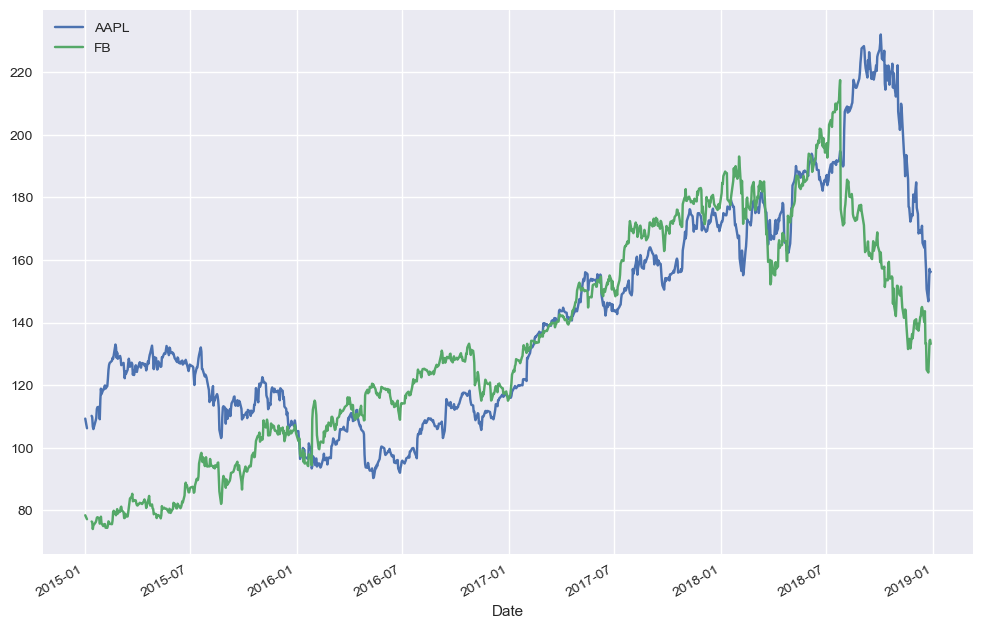

In [685]:
#stocks
stocks.plot(figsize = (12,8));

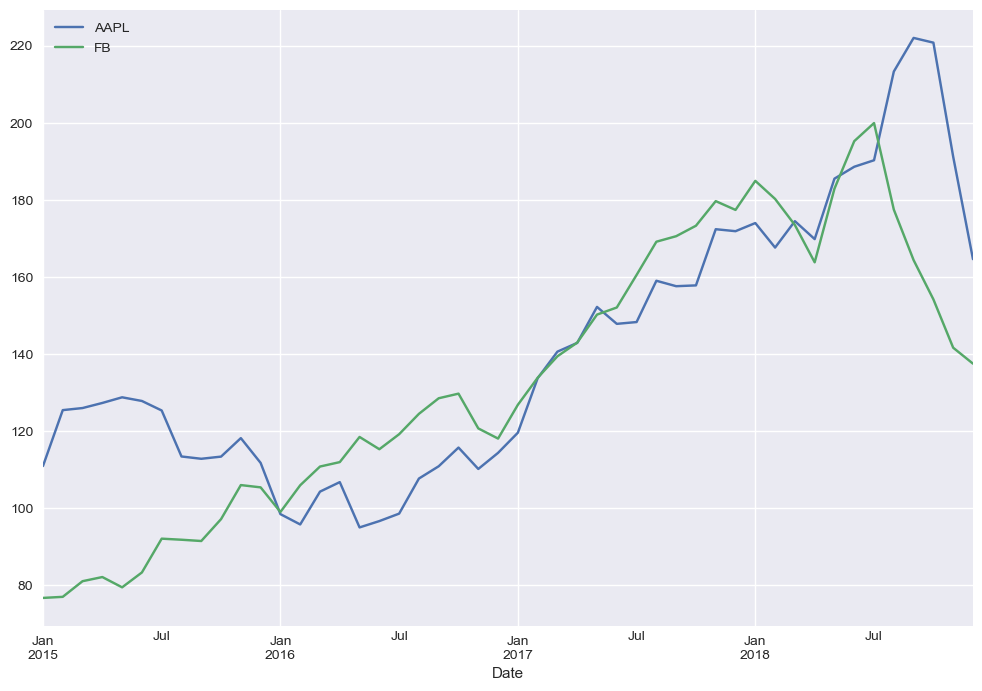

In [687]:
#stocks_m
stocks_m.plot(figsize = (12,8));

102. __Downsample__ stocks to __weekly__ frequency, showing prices on __Fridays__!
Whast was __Facebook´s__ stock price on the __fourth Friday__ in __January 2015__?

In [739]:
stocks.resample(rule = "W-FRI", kind = 'timestamp').last()

,AAPL,FB
Date,,
2015-01-02,109.3300,78.4500
2015-01-09,112.0100,77.7400
2015-01-16,105.9900,75.1800
2015-01-23,112.9800,77.8300
2015-01-30,117.1600,75.9100
...,...,...
2018-11-30,178.5800,140.6100
2018-12-07,168.4900,137.4200
2018-12-14,165.4800,144.0600


In [737]:
stocks.resample(rule = "W-FRI", kind = 'timestamp').last().iloc[3,1].round(2)

77.83

Facebook´s stock price on the fourth Friday in January 2015 was ... 77.83!

In [ ]:
# run the cell! -> January 2015 prices
stocks.loc["2015-01"]

103. __Create__ a __DatetimeIndex__ with all __31 days__ in __January 2015__! __Save__ the Index in the variable __alldays_jan__

In [723]:
alldays_jan = pd.date_range(start = "2015-01-01" , 
                            periods = 31, 
                            freq = 'D')
alldays_jan

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10', '2015-01-11', '2015-01-12',
               '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16',
               '2015-01-17', '2015-01-18', '2015-01-19', '2015-01-20',
               '2015-01-21', '2015-01-22', '2015-01-23', '2015-01-24',
               '2015-01-25', '2015-01-26', '2015-01-27', '2015-01-28',
               '2015-01-29', '2015-01-30', '2015-01-31'],
              dtype='datetime64[ns]', freq='D')

In [725]:
# run the cell!
alldays_jan

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10', '2015-01-11', '2015-01-12',
               '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16',
               '2015-01-17', '2015-01-18', '2015-01-19', '2015-01-20',
               '2015-01-21', '2015-01-22', '2015-01-23', '2015-01-24',
               '2015-01-25', '2015-01-26', '2015-01-27', '2015-01-28',
               '2015-01-29', '2015-01-30', '2015-01-31'],
              dtype='datetime64[ns]', freq='D')

In [743]:
stocks.head()

,AAPL,FB
Date,,
2015-01-02,109.3300,78.4500
2015-01-05,106.2500,77.1900
2015-01-06,106.2600,76.1500
2015-01-07,107.7500,76.1500
2015-01-08,111.8900,78.1800


104. __Reindex stocks__ by __alldays_jan__ and __forward fill__ any NaN-Values!

In [755]:
stocks.reindex(labels = alldays_jan , 
               method= 'ffill',
               axis = 0
              )

,AAPL,FB
2015-01-01,NaN,NaN
2015-01-02,109.3300,78.4500
2015-01-03,109.3300,78.4500
2015-01-04,109.3300,78.4500
2015-01-05,106.2500,77.1900
2015-01-06,106.2600,76.1500
2015-01-07,107.7500,76.1500
2015-01-08,111.8900,78.1800
2015-01-09,112.0100,77.7400
2015-01-10,112.0100,77.7400


# Well Done!

-------------------

# Hints (Spolier!)

98. resample() and last() methods

99. pass "period" to the kind parameter

100. resample() and mean() methods


101. plot() method, plt.show()

102. use "W-Fri" and last() method

103. pd.date_range() method

104. reindex() method, method parameter